In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import spearmanr, pearsonr
import os

In [2]:
df_gpt_08 = pd.read_excel('/pasteur2/u/suyc/VLMEval/VLMEvalKit/outputs/cambrian_13b/cambrian_13b_MMVet_gpt-4o-0806.xlsx')
df_gpt_05 = pd.read_excel('/pasteur2/u/suyc/VLMEval/VLMEvalKit/outputs/cambrian_13b/cambrian_13b_MMVet_gpt-4o-0513.xlsx')
# only keep question, answer, prediction, and score column
df_gpt_08 = df_gpt_08[['index', 'question', 'answer', 'prediction', 'score']]
df_gpt_05 = df_gpt_05[['index', 'question', 'answer', 'prediction', 'score']]

In [3]:
merged_df = pd.merge(df_gpt_05, df_gpt_08, on=['index', 'question', 'answer', 'prediction'], suffixes=('_gpt4o-0513', '_gpt4o-0806'))
merged_df

,index,question,answer,prediction,score_gpt4o-0513,score_gpt4o-0806
0,1,What is x in the equation?,-1<AND>-5,To find the value of x in the equation x + 3(x...,0.0,0.0
1,2,What is d in the last equation?,1.25<OR>=1.25<OR>5/4,"To find the value of d in the second equation,...",0.0,0.0
2,3,What is x in the equation?,0.75<OR>=0.75<OR>3/4,To find the value of x in the equation 8x + 11...,0.0,0.0
3,4,What is the answer to the bottom left equation?,12<OR>=12,"The answer to the bottom left equation, which ...",0.9,1.0
4,5,What is the answer to the second equation on t...,7<OR>=7,The answer to the second equation on the right...,0.0,0.0
...,...,...,...,...,...,...
213,214,The table below gives information on consumer ...,The table shows percentages of consumer expend...,The table presents data on consumer spending i...,0.0,0.3
214,215,The pie charts below show units of electricity...,The pie charts compare the amount of electrici...,The pie charts illustrate the distribution of ...,0.3,0.0
215,216,Chorleywood is a village near London whose pop...,The map shows the growth of a village called C...,The map illustrates the evolution of Chorleywo...,0.8,0.6
216,217,The map below is of the town of Garlsdon. A ne...,The map shows two potential locations (S1 and ...,The map of Garlsdon illustrates the town's geo...,0.3,0.0


In [4]:
diff_df = merged_df[merged_df['score_gpt4o-0513'] != merged_df['score_gpt4o-0806']]
diff_df

,index,question,answer,prediction,score_gpt4o-0513,score_gpt4o-0806
3,4,What is the answer to the bottom left equation?,12<OR>=12,"The answer to the bottom left equation, which ...",0.9,1.0
10,11,What is the price difference between diesel an...,0.11,The price difference between diesel and regula...,0.9,1.0
12,13,What is the cost of three bottles of Moet cham...,344.97,The cost of three bottles of Moet & Chandon Im...,0.9,1.0
13,14,I am getting one funghi pizza and one prosciut...,"14.8<OR>14,8",To calculate the total cost for one funghi piz...,0.0,1.0
18,19,What is located to the right of the shampoo?,conditioner,"To the right of the shampoo, there is a condit...",0.1,1.0
...,...,...,...,...,...,...
213,214,The table below gives information on consumer ...,The table shows percentages of consumer expend...,The table presents data on consumer spending i...,0.0,0.3
214,215,The pie charts below show units of electricity...,The pie charts compare the amount of electrici...,The pie charts illustrate the distribution of ...,0.3,0.0
215,216,Chorleywood is a village near London whose pop...,The map shows the growth of a village called C...,The map illustrates the evolution of Chorleywo...,0.8,0.6
216,217,The map below is of the town of Garlsdon. A ne...,The map shows two potential locations (S1 and ...,The map of Garlsdon illustrates the town's geo...,0.3,0.0


In [19]:
for id, row in diff_df.sample(20).iterrows():
    print('Question: ', row['question'])
    print('Answer: ', row['answer'])
    print('Prediction: ', row['prediction'])
    print('Score GPT-0513: ', row['score_gpt4o-0513'])
    print('Score GPT-0806: ', row['score_gpt4o-0806'])
    print('---------------------------------------------------')

Question:  How to cook this dish?
Answer:  This dish is called "Vegan Sweet Potato Chickpea Curry".

Prep Time:
10 mins
Cook Time:
20 mins
Total Time:
30 mins
Servings:
6

Ingredients
3 tablespoons olive oil

1 onion, chopped

2 cloves garlic, minced

2 teaspoons minced fresh ginger root

1 (15 ounce) can chickpeas, drained

1 (14.5 ounce) can diced tomatoes

1 (14 ounce) can coconut milk

1 sweet potato, cubed

1 tablespoon garam masala

1 teaspoon ground cumin

1 teaspoon ground turmeric

½ teaspoon salt

¼ teaspoon red chile flakes

1 cup baby spinach


Directions
Step 1
Heat oil in a skillet over medium heat. Cook onion, garlic, and ginger in hot oil until softened, about 5 minutes. Add chickpeas, tomatoes, coconut milk, and sweet potato. Bring to a boil, reduce heat to low, and simmer until tender, about 15 minutes.
Step 2
Season with garam masala, cumin, turmeric, salt, and chile flakes. Add spinach right before serving.
Prediction:  To cook this dish, you'll need to prepare a ri

In [22]:
# merge the two dataframes according model column
df = pd.merge(dfs['gpt-3.5-turbo'], dfs['gpt-4o'], on='Model', suffixes=('_3.5', '_4o'))
df = pd.merge(df, dfs['gpt-4-0613'], on='Model')
# rename column accuracy as accuracy_4-0613
df = df.rename(columns={'Accuracy': 'Accuracy_4-0613'})

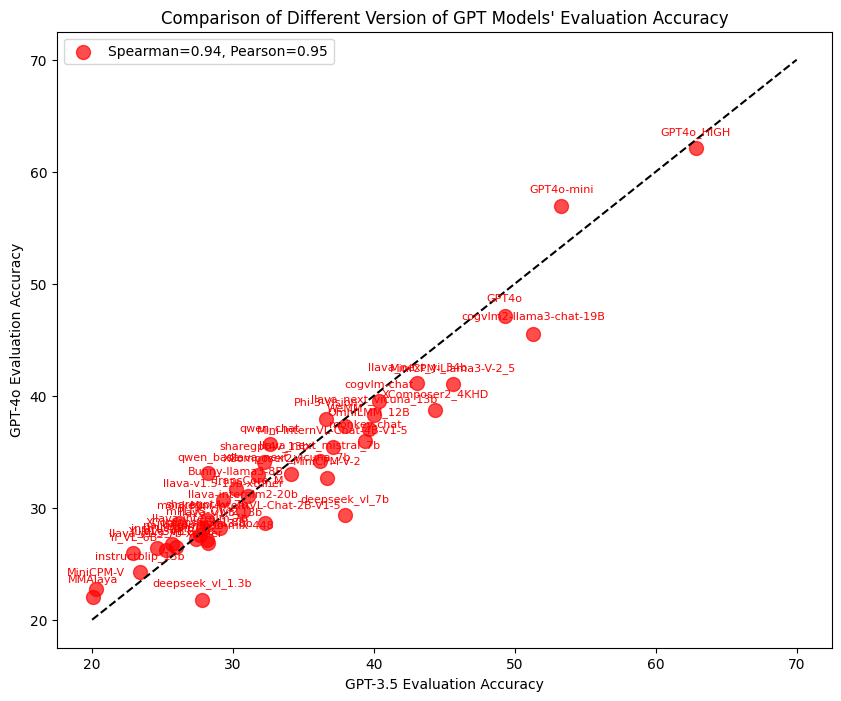

In [23]:
# 绘制图像
plt.figure(figsize=(10, 8))

# 绘制 4-choice 的数据
# plt.scatter(df['Accuracy_3.5'], df['Accuracy_4-0613'], color='red', label='model_base_correlation', alpha=0.7, s=100)
plt.scatter(df['Accuracy_3.5'], df['Accuracy_4o'], color='red', label='model_base_correlation', alpha=0.7, s=100)

# 添加注释
# for idx, row in df.iterrows():
#     plt.annotate(row['Model'], (row['Accuracy_3.5'], row['Accuracy_4-0613']),
#                  textcoords="offset points", xytext=(0, 10), ha='center', fontsize=8, color='red')
for idx, row in df.iterrows():
    plt.annotate(row['Model'], (row['Accuracy_3.5'], row['Accuracy_4o']),
                 textcoords="offset points", xytext=(0, 10), ha='center', fontsize=8, color='red')

# 计算相关系数
# spearman_rs_4, _ = spearmanr(df['Accuracy_3.5'], df['Accuracy_4-0613'])
# pearson_rs_4, _ = pearsonr(df['Accuracy_3.5'], df['Accuracy_4-0613'])
spearman_rs_4, _ = spearmanr(df['Accuracy_3.5'], df['Accuracy_4o'])
pearson_rs_4, _ = pearsonr(df['Accuracy_3.5'], df['Accuracy_4o'])

# 图像设置
plt.xlabel('GPT-3.5 Evaluation Accuracy')
# plt.ylabel('GPT-4-0613 Evaluation Accuracy')
plt.ylabel('GPT-4o Evaluation Accuracy')
plt.title(f"Comparison of Different Version of GPT Models' Evaluation Accuracy")

# 添加图例
plt.legend([f'Spearman={spearman_rs_4:.2f}, Pearson={pearson_rs_4:.2f}'], loc='best')
# draw y=x line
plt.plot([20, 70], [20, 70], color='black', linestyle='--')
# 显示图像
plt.show()